In [72]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt


In [135]:
data = pd.read_csv('../data/adult.csv')
# data.head(3)
# data.describe(include = ['O'])

In [170]:
# Data load
data = pd.read_csv('../data/adult.csv')

# Data sanitisation
data = data.replace('?', 'NA')

data = data.replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
data = data.replace(['Wife', 'Husband'], 'Married')

data = data.replace('<=50K', 0)
data = data.replace('>50K', 1)
labels = data['income']
data = data.drop(columns='income')

data.loc[data['native.country'] != 'United-States', 'native.country'] = 'Outside-United-States' 
# print(data['native.country'].value_counts())

data = data.drop(columns = ['capital.gain', 'education']) #exista coloana education.num redundanta
# data.head(30)

In [171]:
# DATA PREPROCESSING

# 1. ONE HOT ENCODINGS FOR NOMINAL VALUES - WIP
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

for col in ['marital.status', 'workclass', 'relationship', 'occupation', 'race', 'sex', 'native.country']:
    one_hot = pd.get_dummies(data[col])
    data = data.drop(col,axis = 1)
    
    if 'NA' in one_hot:
        one_hot = one_hot.drop(columns = 'NA')
        
    if 'Married' in one_hot and 'Married' in data:
        one_hot = one_hot.drop(columns = 'Married')
        
    data = data.join(one_hot)
data


,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
0,90,77053,9,4356,40,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,82,132870,9,4356,18,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,66,186061,10,4356,40,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,54,140359,4,3900,40,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,41,264663,10,3900,40,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,40,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
32557,27,257302,12,0,38,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32558,40,154374,9,0,40,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32559,58,151910,9,0,40,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [172]:
# 2. MIN-MAX SCALER FOR NUMERICAL VALUES COLUMNS
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import minmax_scale


data[['fnlwgt','capital.loss', 'age', 'education.num', 'hours.per.week']] = \
    minmax_scale(data[['fnlwgt','capital.loss', 'age', 'education.num', 'hours.per.week']])
data


,age,fnlwgt,education.num,capital.loss,hours.per.week,Divorced,Married,Never-married,Separated,Widowed,...,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Outside-United-States,United-States
0,1.000000,0.043987,0.533333,1.000000,0.397959,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0.890411,0.081896,0.533333,1.000000,0.173469,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,0.671233,0.118021,0.600000,1.000000,0.397959,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,0.506849,0.086982,0.200000,0.895317,0.397959,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0.328767,0.171404,0.600000,0.895317,0.397959,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,0.202298,0.600000,0.000000,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
32557,0.136986,0.166404,0.733333,0.000000,0.377551,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
32558,0.315068,0.096500,0.533333,0.000000,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
32559,0.561644,0.094827,0.533333,0.000000,0.397959,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1


In [ ]:
# for col in data:
#     continue
#     print(col.upper())
#     print(data[col].unique())
#     print()

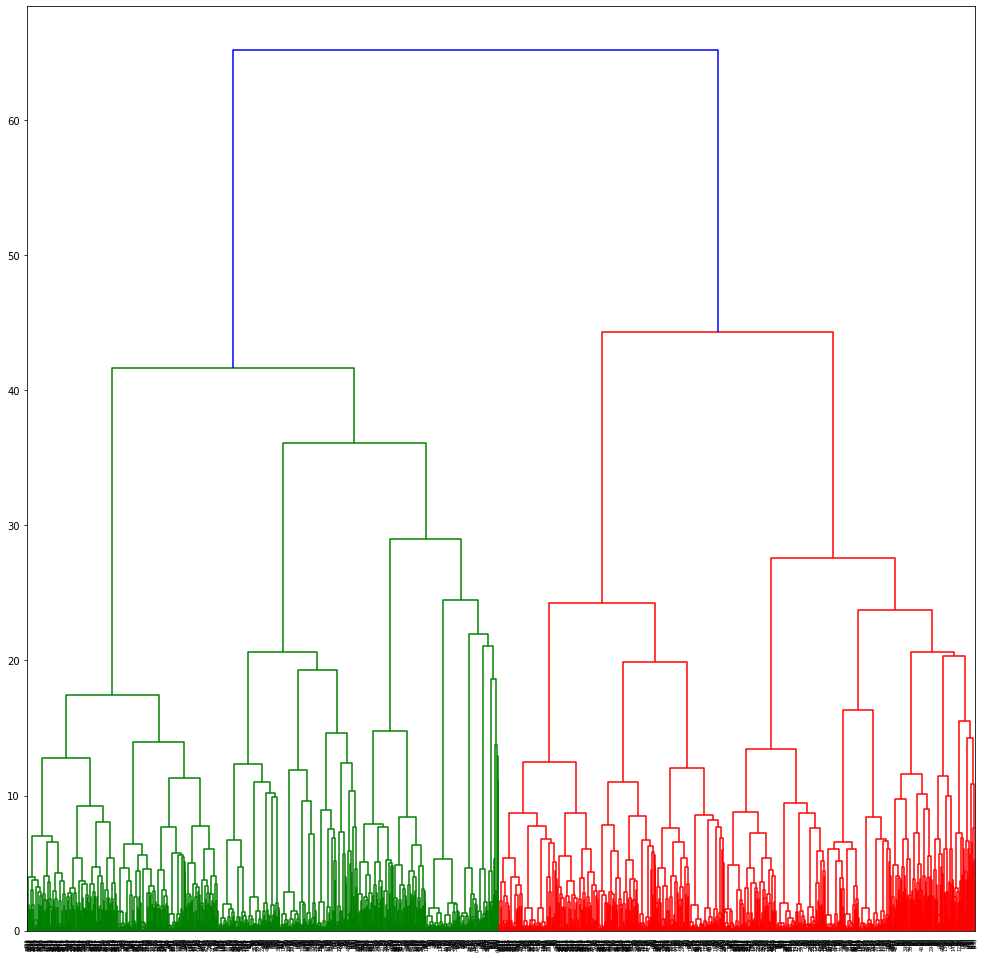

In [193]:
# CLUSTERING
from sklearn.cluster import AgglomerativeClustering
# train_data, test_data, train_labels, test_labels = train_test_split(data, labels, stratify=labels, shuffle=True, test_size=0.33)

# clustering = AgglomerativeClustering().fit(data)
# clustering
# AgglomerativeClustering()
# print(clustering.labels_)

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data[:5000], 'ward')

labelList = range(5000)

plt.figure(figsize=(17, 17))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode = 'level', 
            p = 10)
plt.show()